In [144]:
library(ISLR)
library(gam)
library(splines)
library(tidyverse)
library(caret)
library(leaps)
library(corrplot)
library(ggplot2)
library(dplyr)
library(gam)
library(glmnet)

Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack


Loaded glmnet 4.1-6



In [117]:
data = read.csv("../data/clean_data/final.csv")

In [118]:
head(data)

,HDI.Rank,Country,Gender.Inequality.Index.Value,Gender.Inequality.Index.Rank,Maternal.Mortality.Ratio,Adolescent.Birth.Rate,Women.Share.of.Seats.in.Parliament,Female.Population.with.Some.Secondary.Education,Male.Population.with.Some.Secondary.Education,Female.Labour.Force.Participation.Rate,Male.Labour.Force.Participation.Rate
,<dbl>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Switzerland,0.018,3,5,2.2,39.8,96.9,97.5,61.7,72.7
2,2,Norway,0.016,2,2,2.3,45.0,99.1,99.3,60.3,72.0
3,3,Iceland,0.043,8,4,5.4,47.6,99.8,99.7,61.7,70.5
4,4,"Hong Kong, China (SAR)",0.000,0,0,1.6,0.0,77.1,83.4,53.5,65.8
5,5,Australia,0.073,19,6,8.1,37.9,94.6,94.4,61.1,70.5
6,6,Denmark,0.013,1,4,1.9,39.7,95.1,95.2,57.7,66.7


In [119]:
data = data %>% rename(
    "HDI_Rank" = "HDI.Rank",
    "Gender_Inequality_Index_Value" = "Gender.Inequality.Index.Value",
    "Gender_Inequality_Index_Rank" = "Gender.Inequality.Index.Rank",
    "Maternal_Mortality_Ratio" = "Maternal.Mortality.Ratio",
    "Adolescent_Birth_Rate" = "Adolescent.Birth.Rate",
    "Women_share_of_Seats_in_Parliament" = "Women.Share.of.Seats.in.Parliament",
    "Female_Population_with_Some_Secondary_Education" = "Female.Population.with.Some.Secondary.Education",
    "Male_Population_with_Some_Secondary_Education" = "Male.Population.with.Some.Secondary.Education",
    "Female_Labour_Force_Participation_Rate" = "Female.Labour.Force.Participation.Rate",
    "Male_Labour_Force_Participation_Rate" = "Male.Labour.Force.Participation.Rate"
)


In [120]:

#replace na with mean
data$Maternal_Mortality_Ratio[is.na(data$Maternal_Mortality_Ratio)] = mean(data$Maternal_Mortality_Ratio, na.rm = TRUE)

In [121]:
numeric_data = data %>% select_if(is.numeric)
corr_matrix = cor(numeric_data)

corr_matrix

,HDI_Rank,Gender_Inequality_Index_Value,Gender_Inequality_Index_Rank,Maternal_Mortality_Ratio,Adolescent_Birth_Rate,Women_share_of_Seats_in_Parliament,Female_Population_with_Some_Secondary_Education,Male_Population_with_Some_Secondary_Education,Female_Labour_Force_Participation_Rate,Male_Labour_Force_Participation_Rate
HDI_Rank,1.00000000,0.7514582,0.7549718,0.6688352,0.7634002,-0.24772349,-0.6525573,-0.5945172,0.09740211,0.15353006
Gender_Inequality_Index_Value,0.75145823,1.0000000,0.9976621,0.6084885,0.6584749,-0.23457433,-0.3564104,-0.2720597,0.23052301,0.42532331
Gender_Inequality_Index_Rank,0.75497181,0.9976621,1.0000000,0.6231101,0.6709990,-0.23245900,-0.3603170,-0.2739976,0.24111702,0.42413094
Maternal_Mortality_Ratio,0.66883515,0.6084885,0.6231101,1.0000000,0.7372338,-0.15209160,-0.5874916,-0.5208702,0.24240635,0.19234246
Adolescent_Birth_Rate,0.76340020,0.6584749,0.6709990,0.7372338,1.0000000,-0.10386621,-0.6024250,-0.5440827,0.21826712,0.15983100
Women_share_of_Seats_in_Parliament,-0.24772349,-0.2345743,-0.2324590,-0.1520916,-0.1038662,1.00000000,0.1693096,0.1702654,0.21279477,0.06542927
Female_Population_with_Some_Secondary_Education,-0.65255733,-0.3564104,-0.3603170,-0.5874916,-0.6024250,0.16930960,1.0000000,0.9787175,0.10929913,0.15879261
Male_Population_with_Some_Secondary_Education,-0.59451722,-0.2720597,-0.2739976,-0.5208702,-0.5440827,0.17026537,0.9787175,1.0000000,0.15219099,0.20248229
Female_Labour_Force_Participation_Rate,0.09740211,0.2305230,0.2411170,0.2424064,0.2182671,0.21279477,0.1092991,0.1521910,1.00000000,0.75423320
Male_Labour_Force_Participation_Rate,0.15353006,0.4253233,0.4241309,0.1923425,0.1598310,0.06542927,0.1587926,0.2024823,0.75423320,1.00000000


The two clumns `Gender_Inequality_Index_Value` and `Gender_Inequality_Index_Rank` are extremely correlated. We will drop the `Gender_Inequality_Index_Rank` column.

In [122]:
#drop Gender_Inequality_Index_Rank column

data = subset(data, select = -c(Gender_Inequality_Index_Rank))

In [123]:
data_std = data %>% select_if(is.numeric) %>% scale(center = TRUE, scale = TRUE)
data_std = data.frame(data_std)

In [124]:
#split data into train and test

set.seed(123)
sample = sample(c(TRUE, FALSE), nrow(data_std), replace=TRUE, prob=c(0.7,0.3))
train = data_std[sample,]
test = data_std[!sample,]

In [125]:
#linear regression model

lm_data = lm(Gender_Inequality_Index_Value ~ ., data = train)
summary(lm_data)


Call:
lm(formula = Gender_Inequality_Index_Value ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.05034 -0.20283  0.00146  0.27339  1.95669 

Coefficients:
                                                 Estimate Std. Error t value
(Intercept)                                      0.003109   0.042860   0.073
HDI_Rank                                         0.397586   0.085112   4.671
Maternal_Mortality_Ratio                         0.185331   0.071032   2.609
Adolescent_Birth_Rate                            0.324655   0.078231   4.150
Women_share_of_Seats_in_Parliament              -0.083630   0.045648  -1.832
Female_Population_with_Some_Secondary_Education -0.598473   0.257475  -2.324
Male_Population_with_Some_Secondary_Education    0.803216   0.244233   3.289
Female_Labour_Force_Participation_Rate          -0.304284   0.070872  -4.293
Male_Labour_Force_Participation_Rate             0.481908   0.069931   6.891
                                          

RMSE for linear regression model is:  0.5915681

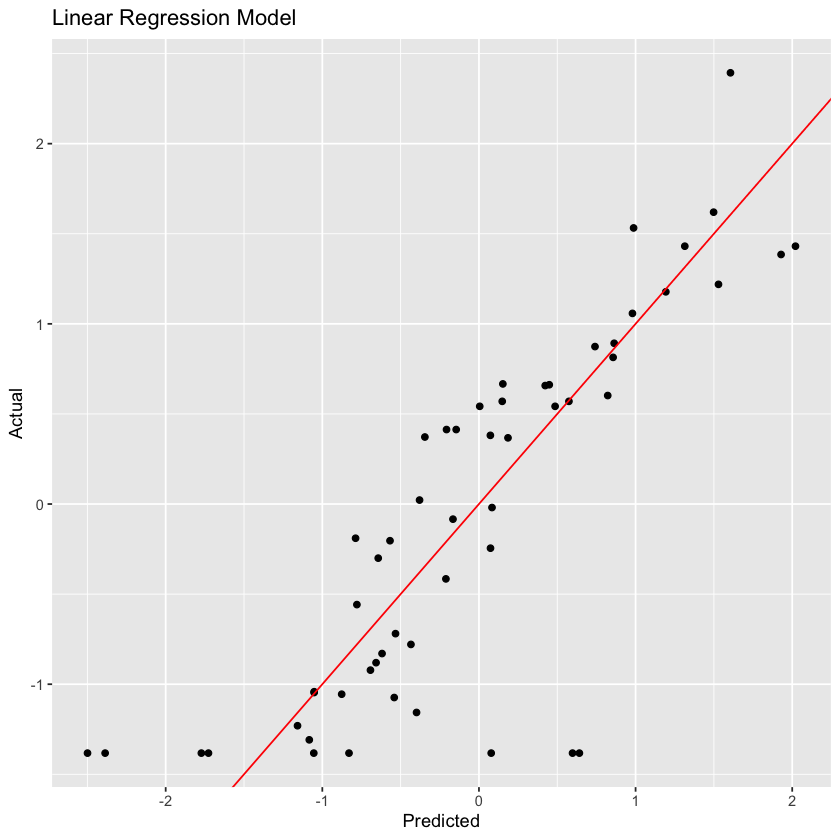

In [126]:

#predict on test data
lm_pred = predict(lm_data, test)


ggplot()+
geom_point(aes(x = lm_pred, y = test$Gender_Inequality_Index_Value)) +
geom_abline(intercept = 0, slope = 1, color = "red") +
labs(title = "Linear Regression Model", x = "Predicted", y = "Actual")

#calculate rmse
lm_rmse = sqrt(mean((test$Gender_Inequality_Index_Value - lm_pred)^2))
cat("RMSE for linear regression model is: ", lm_rmse)


In [127]:
sum(is.na(lm_pred))

[1] 0

In [128]:
#AIC, BIC and adjusted R-squared for linear regression model

lm_aic = AIC(lm_data)
lm_bic = BIC(lm_data)
lm_adj_r2 = summary(lm_data)$adj.r.squared

cat(" AIC for linear regression model is: ", lm_aic, "\n", "BIC for linear regression model is: ", lm_bic, "\n", "Adjusted R-squared for linear regression model is: ", lm_adj_r2)

 AIC for linear regression model is:  214.51 
 BIC for linear regression model is:  243.9264 
 Adjusted R-squared for linear regression model is:  0.7451306

In [129]:
#Subset selection

#best subset selection
best_model = regsubsets(Gender_Inequality_Index_Value ~ ., data = train, nvmax = 8)

In [130]:
summary_best_model = summary(best_model)

In [142]:
summary_best_model

Subset selection object
Call: regsubsets.formula(Gender_Inequality_Index_Value ~ ., data = train, 
    nvmax = 8)
8 Variables  (and intercept)
                                                Forced in Forced out
HDI_Rank                                            FALSE      FALSE
Maternal_Mortality_Ratio                            FALSE      FALSE
Adolescent_Birth_Rate                               FALSE      FALSE
Women_share_of_Seats_in_Parliament                  FALSE      FALSE
Female_Population_with_Some_Secondary_Education     FALSE      FALSE
Male_Population_with_Some_Secondary_Education       FALSE      FALSE
Female_Labour_Force_Participation_Rate              FALSE      FALSE
Male_Labour_Force_Participation_Rate                FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         HDI_Rank Maternal_Mortality_Ratio Adolescent_Birth_Rate
1  ( 1 ) "*"      " "                      " "                  
2  ( 1 ) "*"      " "                      

In [131]:
min_bic_model = which.min(summary_best_model$bic)
max_r2_model = which.max(summary_best_model$adjr2)
min_cp_model = which.min(summary_best_model$cp)

In [132]:
cat(" Best subset selection model with minimum BIC has", min_bic_model, "predictors \n", "Best subset selection model with maximum adjusted R-squared has", max_r2_model, "predictors\n", "Best subset selection model with minimum Cp has", min_cp_model, "predictors")

 Best subset selection model with minimum BIC has 7 predictors 
 Best subset selection model with maximum adjusted R-squared has 8 predictors
 Best subset selection model with minimum Cp has 8 predictors

We will choose the model with 8 predictors

In [133]:
#forward stepwise selection

intercept_only = lm(Gender_Inequality_Index_Value ~ 1, data = train)
all = lm(Gender_Inequality_Index_Value ~ ., data = train)
forward_model = step(intercept_only, direction='forward', scope = formula(all), trace = 0)

In [134]:
forward_model$anova

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,139,136.92084,-1.113528
+ HDI_Rank,-1,71.7744151,138,65.14642,-103.100703
+ Male_Labour_Force_Participation_Rate,-1,13.6588151,137,51.48761,-134.042177
+ Adolescent_Birth_Rate,-1,5.0199351,136,46.46767,-146.403978
+ Female_Labour_Force_Participation_Rate,-1,5.0001222,135,41.46755,-160.342369
+ Male_Population_with_Some_Secondary_Education,-1,3.6328340,134,37.83472,-171.178143
+ Maternal_Mortality_Ratio,-1,2.8630210,133,34.97170,-180.194473
+ Female_Population_with_Some_Secondary_Education,-1,1.2405585,132,33.73114,-183.250948
+ Women_share_of_Seats_in_Parliament,-1,0.8426583,131,32.88848,-184.792801


In [135]:
forward_model$coefficients

(Intercept) 
                                    0.003109061 
                                       HDI_Rank 
                                    0.397585783 
           Male_Labour_Force_Participation_Rate 
                                    0.481907792 
                          Adolescent_Birth_Rate 
                                    0.324655295 
         Female_Labour_Force_Participation_Rate 
                                   -0.304284121 
  Male_Population_with_Some_Secondary_Education 
                                    0.803216232 
                       Maternal_Mortality_Ratio 
                                    0.185331387 
Female_Population_with_Some_Secondary_Education 
                                   -0.598472578 
             Women_share_of_Seats_in_Parliament 
                                   -0.083630050

In [136]:
#predicting using the best model

forward_pred = predict(forward_model, test)


In [137]:
#calculate rmse
forward_rmse = sqrt(mean((test$Gender_Inequality_Index_Value - forward_pred)^2))
cat("RMSE for forward stepwise selection model is: ", forward_rmse)

RMSE for forward stepwise selection model is:  0.5915681

In [138]:
backward = step(all, direction='backward', scope=formula(all), trace=0)

In [139]:
backward_model$anova

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,131,32.88848,-184.7928


In [140]:
backward$coefficients

(Intercept) 
                                    0.003109061 
                                       HDI_Rank 
                                    0.397585783 
                       Maternal_Mortality_Ratio 
                                    0.185331387 
                          Adolescent_Birth_Rate 
                                    0.324655295 
             Women_share_of_Seats_in_Parliament 
                                   -0.083630050 
Female_Population_with_Some_Secondary_Education 
                                   -0.598472578 
  Male_Population_with_Some_Secondary_Education 
                                    0.803216232 
         Female_Labour_Force_Participation_Rate 
                                   -0.304284121 
           Male_Labour_Force_Participation_Rate 
                                    0.481907792

In [141]:
#predicting using backward model

backward_pred = predict(backward, test)

#calculate rmse
backward_rmse = sqrt(mean((test$Gender_Inequality_Index_Value - backward_pred)^2))
cat("RMSE for backward stepwise selection model is: ", backward_rmse)

RMSE for backward stepwise selection model is:  0.5915681

Since our data is correlated, we will use Ridge Regression to avoid overfitting.

In [146]:
#creating a model matrix

X = model.matrix(Gender_Inequality_Index_Value ~., data = train)
Y = train$Gender_Inequality_Index_Value

#Fit ridge regression model using cross-validation to find lambda
fit_ridge = cv.glmnet(X, Y, alpha = 0, lambda = NULL, type.measure = "mse")

[1] 0.8827341

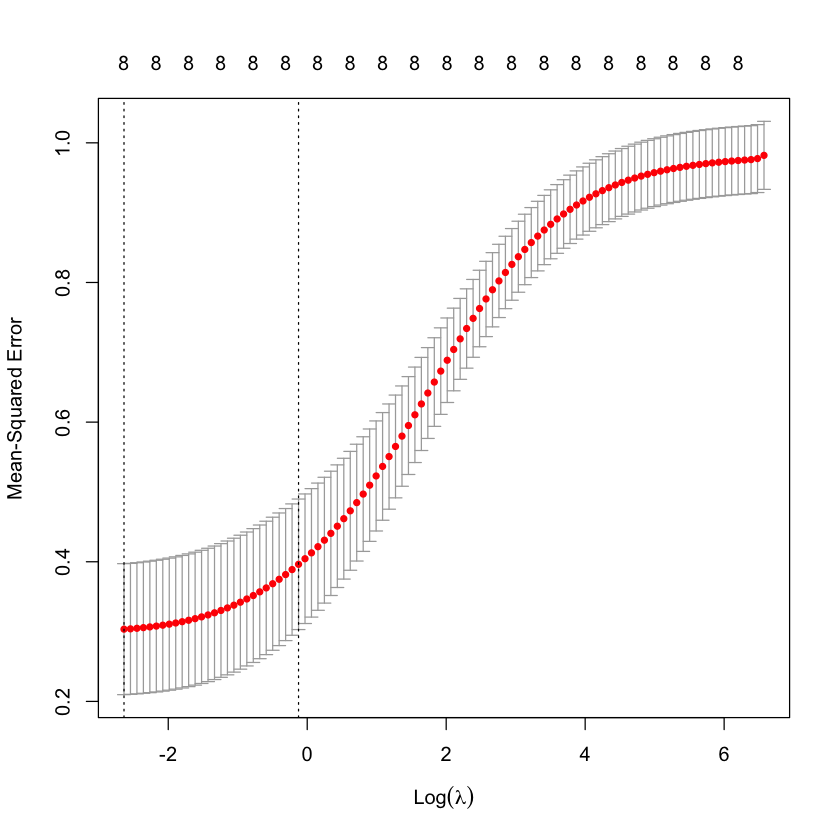

In [147]:
lambda_1se = fit_ridge$lambda.1se
lambda_1se
#using optimal lambda to fit the model
fit_ridge_ftse = glmnet(X, Y, alpha = 0, lambda = lambda_1se)
#plot the model
plot(fit_ridge)

In [ ]:
plot(df$date, df$value, xlab = "Date", ylab = "FTSE", col = "blue", pch = 20)
lines(df$date, predict(fit_ridge_ftse, X), col = "red", lwd = 2)
legend("topleft", legend = c("Data", "Regularized Polynomial Model"),
       col = c("blue", "red"), pch = c(20, NA), lwd = c(NA, 2))

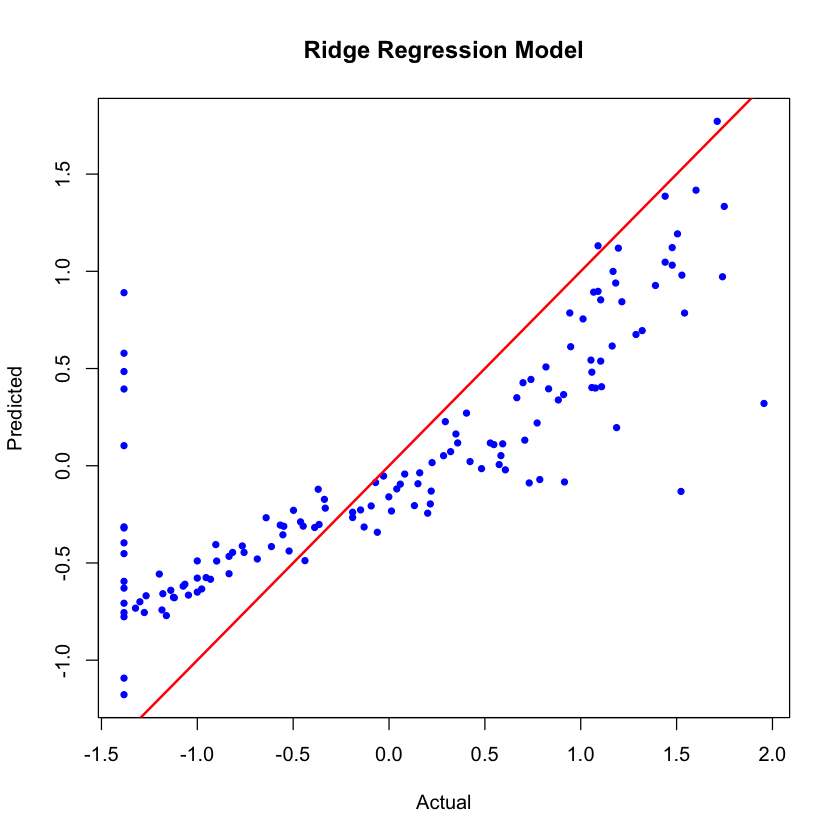

In [149]:
plot(train$Gender_Inequality_Index_Value, predict(fit_ridge_ftse, X), xlab = "Actual", ylab = "Predicted", col = "blue", pch = 20, title(main = "Ridge Regression Model"))
abline(0, 1, col = "red", lwd = 2)
